In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

data_set = pd.read_csv('train.csv')

In [2]:
data_set

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (Class label)
0,Male,17,7,4,7,3,2,extraverted
1,Male,19,4,5,4,6,6,serious
2,Female,18,7,6,4,5,5,dependable
3,Female,22,5,6,7,4,3,extraverted
4,Female,19,7,4,6,5,4,lively
...,...,...,...,...,...,...,...,...
704,Female,20,4,5,6,6,1,responsible
705,Male,18,6,3,1,5,5,dependable
706,Male,22,5,2,3,6,1,serious
707,Male,19,5,6,5,7,5,extraverted


In [3]:
data_set.isnull().sum()

Gender                       0
Age                          0
openness                     0
neuroticism                  0
conscientiousness            0
agreeableness                0
extraversion                 0
Personality (Class label)    0
dtype: int64

In [4]:
# sns.pairplot(data_set)

<AxesSubplot:>

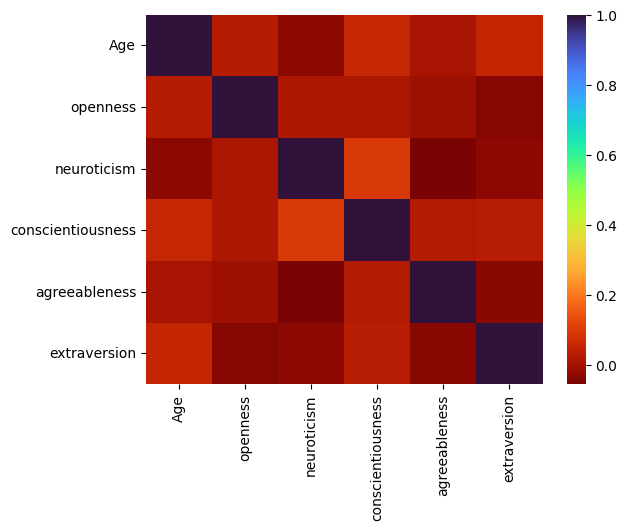

In [5]:
%matplotlib inline
corr = data_set.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='turbo_r')

In [6]:
data_set['Personality (Class label)'].value_counts()

serious        161
extraverted    150
dependable     138
lively         134
responsible    126
Name: Personality (Class label), dtype: int64

In [7]:
raw_df = pd.get_dummies(data_set, drop_first=True)


In [8]:
raw_df

,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Gender_Female,Gender_Male,Personality (Class label)_extraverted,Personality (Class label)_lively,Personality (Class label)_responsible,Personality (Class label)_serious
0,17,7,4,7,3,2,0,1,1,0,0,0
1,19,4,5,4,6,6,0,1,0,0,0,1
2,18,7,6,4,5,5,1,0,0,0,0,0
3,22,5,6,7,4,3,1,0,1,0,0,0
4,19,7,4,6,5,4,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
704,20,4,5,6,6,1,1,0,0,0,1,0
705,18,6,3,1,5,5,0,1,0,0,0,0
706,22,5,2,3,6,1,0,1,0,0,0,1
707,19,5,6,5,7,5,0,1,1,0,0,0


In [9]:
data = raw_df.drop(['Personality (Class label)_extraverted', 'Personality (Class label)_lively', 'Personality (Class label)_responsible'], axis=1)

In [10]:
data

,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Gender_Female,Gender_Male,Personality (Class label)_serious
0,17,7,4,7,3,2,0,1,0
1,19,4,5,4,6,6,0,1,1
2,18,7,6,4,5,5,1,0,0
3,22,5,6,7,4,3,1,0,0
4,19,7,4,6,5,4,1,0,0
...,...,...,...,...,...,...,...,...,...
704,20,4,5,6,6,1,1,0,0
705,18,6,3,1,5,5,0,1,0
706,22,5,2,3,6,1,0,1,1
707,19,5,6,5,7,5,0,1,0


In [25]:
auto_data = pd.DataFrame()
for column in data.columns:
    if column == 'Age':
        auto_data[column] = data[column]
    elif column == 'Personality (Class label)_serious':
        auto_data[column] = data[column].replace({'1': 1, '2': 2})
    else:
        auto_data[column] = data[column].replace({1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8'})

In [26]:
auto_data

,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Gender_Female,Gender_Male,Personality (Class label)_serious
0,17,7,4,7,3,2,0,1,0
1,19,4,5,4,6,6,0,1,1
2,18,7,6,4,5,5,1,0,0
3,22,5,6,7,4,3,1,0,0
4,19,7,4,6,5,4,1,0,0
...,...,...,...,...,...,...,...,...,...
704,20,4,5,6,6,1,1,0,0
705,18,6,3,1,5,5,0,1,0
706,22,5,2,3,6,1,0,1,1
707,19,5,6,5,7,5,0,1,0


In [27]:
auto_data = pd.get_dummies(auto_data, drop_first=True)

In [28]:

from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(auto_data, random_state=100, train_size=0.8)

In [29]:
train_df

,Age,Personality (Class label)_serious,openness_2,openness_3,openness_4,openness_5,openness_6,openness_7,openness_8,neuroticism_2,...,agreeableness_7,agreeableness_8,extraversion_2,extraversion_3,extraversion_4,extraversion_5,extraversion_6,extraversion_7,Gender_Female_1,Gender_Male_1
457,21,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
44,28,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
222,18,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
366,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
31,18,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,17,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
53,23,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
350,18,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
79,18,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [30]:
train_x = train_df.drop(['Personality (Class label)_serious'], axis=1)
train_y = train_df['Personality (Class label)_serious']
test_x = test_df.drop(['Personality (Class label)_serious'], axis=1)
test_y = test_df['Personality (Class label)_serious']

In [31]:
train_x.dtypes

Age                    int64
openness_2             uint8
openness_3             uint8
openness_4             uint8
openness_5             uint8
openness_6             uint8
openness_7             uint8
openness_8             uint8
neuroticism_2          uint8
neuroticism_3          uint8
neuroticism_4          uint8
neuroticism_5          uint8
neuroticism_6          uint8
neuroticism_7          uint8
neuroticism_8          uint8
conscientiousness_2    uint8
conscientiousness_3    uint8
conscientiousness_4    uint8
conscientiousness_5    uint8
conscientiousness_6    uint8
conscientiousness_7    uint8
conscientiousness_8    uint8
agreeableness_2        uint8
agreeableness_3        uint8
agreeableness_4        uint8
agreeableness_5        uint8
agreeableness_6        uint8
agreeableness_7        uint8
agreeableness_8        uint8
extraversion_2         uint8
extraversion_3         uint8
extraversion_4         uint8
extraversion_5         uint8
extraversion_6         uint8
extraversion_7

In [34]:
train_y.dtype

dtype('uint8')

In [33]:
from statsmodels.api import Logit

model = Logit(train_y, train_x)
model = model.fit()
model.summary()

         Current function value: inf
         Iterations: 35


/home/sivansh/programming/python/personality-prediction/env/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/sivansh/programming/python/personality-prediction/env/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: Singular matrix